# Testes de hipóteses

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Neste documento, vamos formalizar os conceitos de intervalo de confiança e testes de hipóteses. Vamos começar com o intervalo de confiança.

## Intervalos de confiança como testes de hipóteses

### Revisão

O intervalo de confiança é utilizado para criar estimativas intervalares. Quando vemos uma pesquisa que diz que uma média é 50 +/- 5, estamos vendo um intervalo de confiança. O intervalo de confiança é uma faixa de valores que contém o valor real com uma certa probabilidade. Por exemplo, um intervalo de confiança de 95% significa que, se repetirmos o experimento muitas vezes, é esperado que 95% dos intervalos de confiança conterão o valor real.

Não confunda o intervalo de confiança com a probabilidade do parâmetro estar dentro do intervalo. O parâmetro é um valor fixo e não é aleatório. O que é aleatório é o intervalo de confiança, pois é baseado em estimadores amostrais, que são variáveis aleatórias.

Como vimos antes, quando nosso interesse é estimar a média de uma variável contínua, o intervalo de confiança é dado por:

$$
\bar X \pm z_{1-\alpha/2} \frac{S}{\sqrt n}
$$

Aqui, $\bar X$ é a média amostral, $S$ é o desvio padrão amostral, $n$ é o tamanho da amostra e $z_{1-\alpha/2}$ é o quantil da distribuição normal padrão. O valor de $z_{1-\alpha/2}$ é escolhido de acordo com o nível de confiança desejado. Por exemplo, para um nível de confiança de 95%, temos $\alpha = 0.05$ e $z_{1-\alpha/2} = 1.96$.

Após observar os dados, trocamos as letras maiúsculas para minúsculas, denotando que estamos saindo do mundo das variáveis aleatórias (as funções que retornam números) para os números em si. Assim, o intervalo de confiança é escrito como:

$$
\bar x \pm z_{1-\alpha/2} \frac{s}{\sqrt n}
$$

#### Aplicação no python

No python, podemos calcular o intervalo de confiança fazendo as seguintes operações:



In [45]:
tempos = camaras.tempo
media = tempos.mean()
sd = tempos.std()
z = stats.norm.ppf(0.975)
n = len(tempos)

vl_intervalo = z * sd / np.sqrt(n)

media - vl_intervalo, media + vl_intervalo

(3.136057807684683, 3.221624914728558)

Também é possível usar a função `norm.interval` do módulo `scipy.stats` para calcular o intervalo de confiança. Nessa função, o primeiro argumento é o nível de confiança, o segundo é a média amostral e o terceiro é o erro padrão (desvio padrão da amostra dividido pelo número de observações). O retorno é uma tupla com os limites inferior e superior do intervalo de confiança.

In [46]:
stats.norm.interval(confidence=0.95, loc=media, scale=stats.sem(tempos, nan_policy='omit'))

(3.136055668346555, 3.221627054066686)

Também é possível usar a função `t.interval` do módulo `scipy.stats` para calcular o intervalo de confiança. Nesse caso, o primeiro argumento é o nível de confiança, o segundo é o tamanho da amostra menos um, o terceiro é a média amostral e o quarto é o erro padrão.

In [47]:
stats.t.interval(confidence=0.95, df=n-1, loc=media, scale=stats.sem(tempos, nan_policy='omit'))

(3.136050488583062, 3.221632233830179)

Existe uma pequena diferença entre fazer a conta na mão e fazer com a função `t.interval`. A função `t.interval` usa a distribuição t de Student no lugar da distribuição normal. A distribuição t é uma distribuição bem parecida com a distribuição normal, mas é mais achatada. Usamos a distribuição t por razões técnicas, que foram colocadas ao final da apostila por serem mais avançadas.

### Intervalo de confiança para proporção

Na ciência de dados aplicada ao direito, é comum querermos estimar a proporção de um evento. Por exemplo, queremos saber a proporção de decisões favoráveis em um tipo de caso. Neste caso, também utilizamos o TCL para criar intervalos de confiança, afinal, a proporção é um tipo de média, mas de uma variável binária. Vimos anteriormente que a distribuição de probabilidades aplicável no caso de uma variável binária é a distribuição de Bernoulli, sendo que a soma de variáveis Bernoulli é uma variável com distribuição binomial.

**Nota histórica**: a distribuição binomial é uma distribuição discreta (assume valores 0, 1, 2, 3 etc, já que ela é a soma de valores que valem 0 ou 1), enquanto a distribuição normal é uma distribuição contínua. No entanto, o TCL nos permite aproximar a distribuição binomial pela distribuição normal, desde que o tamanho da amostra seja grande. Historicamente, a aproximação da distribuição binomial pela distribuição normal foi feita por Abraham de Moivre em 1743, que descobriu que a distribuição binomial se aproxima da distribuição normal (que nem tinha uma definição clara na época) quando o número de tentativas é grande. Essa demonstração foi feita muito antes do TCL, que é um resultado mais geral.

Para fazer o intervalo de confiança para proporção, utilizamos o TCL, e, portanto, o z-score para criar o intervalo de confiança. O intervalo de confiança é dado por:

$$
\hat p \pm z_{1-\alpha/2} \sqrt{\frac{\hat p (1-\hat p)}{n}}
$$

Aqui, $\hat p$ é a proporção amostral, $n$ é o tamanho da amostra e $z_{1-\alpha/2}$ é o quantil da distribuição normal padrão. O valor de $z_{1-\alpha/2}$ é escolhido de acordo com o nível de confiança desejado. Por exemplo, para um nível de confiança de 95%, temos $\alpha = 0.05$ e $z_{1-\alpha/2} = 1.96$.

Note que utilizamos o valor $\hat p (1-\hat p)$ no lugar de $S$. Isso acontece porque a variância da distribuição de Bernoulli é dada por $p (1 - p)$, fato que não vamos demostrar aqui. Então, substituímos o valor de $p$, desconhecido, pelo valor de $\hat p$, que é a estimativa amostral da proporção. Aqui também fazemos uso do Teorema de Slutsky para afirmar que a distribuição amostral da proporção seja aproximadamente normal.

Mas existe um segundo jeito de fazer intervalo de confiança para proporções. Esse jeito é baseado no valor máximo que a variância da proporção pode assumir. Vamos ver o gráfico dessa função:


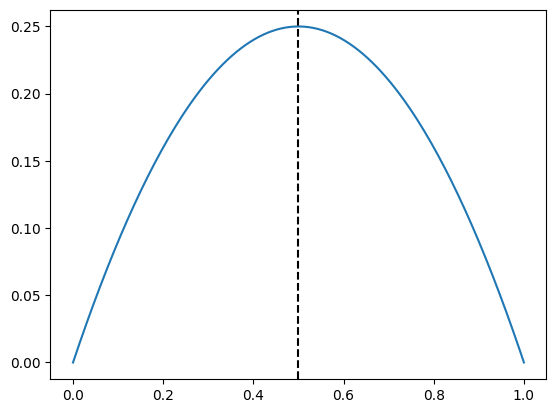

In [26]:
def variancia_bernoulli(p):
  return p * (1 - p)

p_seq = np.linspace(0, 1, 200)

plt.plot(p_seq, variancia_bernoulli(p_seq))
plt.axvline(0.5, color = 'black', linestyle = '--')

Veja que o valor máximo dessa função é 0.25. Isso ocorre porque a variância da proporção é máxima quando a proporção é 0.5. Com isso, podemos fazer um intervalo de confiança mais **conservador**, que é dado por:

$$
\hat p \pm z_{1-\alpha/2} \sqrt{\frac{0.25}{n}} = \hat p \pm \frac{z_{1-\alpha/2}}{2\sqrt n}
$$

#### Aplicação no python

Agora, vamos ver os intervalos de confiança para proporção no python:

In [48]:
desfavoravel = camaras.decisao == 'Negaram'


p_hat = desfavoravel.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.5175147983958988 0.5370852016041012
0.5175001800772997 0.5370998199227003


Como a amostra é grande, os intervalos otimista e conservador são praticamente iguais. Vamos ver com uma amostra pequena:

In [49]:
desfavoravel = camaras.sample(30, random_state=42).decisao == 'Negaram'

p_hat = desfavoravel.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.6574273078376688 0.6759060254956645
0.6568668467439663 0.6764664865893669


Ainda assim, os intervalos são bem próximos. Isso ocorre porque a proporção observada é próxima a 0.5, então o intervalo conservador fica parecido com o otimista. Ao estudar uma informação mais rara, como a probabilidade de maioria nas decisões colegiadas, temos:

In [50]:
maioria = camaras.sample(30, random_state=3).unanimidade == 'Maioria'

p_hat = maioria.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.029815090309067926 0.03685157635759874
0.02353351341063306 0.043133153256033605


Agora, vamos às funções mais diretas do python, que nos dão o intervalo de confiança para proporção. Aqui, não tem muito como fugir do cálculo da variância da Bernoulli.

In [59]:

ic_otimista = stats.norm.interval(confidence=0.95, loc=p_hat, scale=np.sqrt(variancia_bernoulli(p_hat) / len(camaras)))
ic_conservador = stats.norm.interval(confidence=0.95, loc=p_hat, scale=1/2/np.sqrt(len(camaras)))

print(ic_otimista)
print(ic_conservador)

(0.029815090309067926, 0.03685157635759874)
(0.02353351341063306, 0.043133153256033605)


Até existe outra biblioteca, `statsmodels`, que faz o cálculo de intervalo de confiança para proporção, mas ela pode ficar para um curso mais avançado.

## Testes de hipóteses

O teste de hipótese busca responder à seguinte pergunta: há evidências suficientes nos dados para fazer uma afirmação sobre a população? Por exemplo, se observarmos que as taxas de recursos negados em uma câmara é 67,8% e em outra câmara é 70,4%, podemos afirmar que a primeira câmara nega mais casos? Ou essa diferença é devida ao acaso?

Vamos ver esse exemplo no python:

In [50]:
exemplos_camaras = ['03ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,p
0,03ª Câmara de Direito Criminal,528,0.678030
1,08ª Câmara de Direito Criminal,635,0.703937


Uma forma de resolver esse problema é calculando o intervalo de confiança para cada uma das proporções e verificando se os intervalos se sobrepõem. Se eles não se sobrepõem, podemos afirmar que as proporções são diferentes. Se eles se sobrepõem, não podemos afirmar nada. Vamos calcular usando o intervalo otimista:

In [51]:
proporcoes_com_ic = (
  proporcoes
  .assign(
    int_otimista = lambda x: stats.norm.ppf(0.975) * np.sqrt((x.p*(1-x.p)) / x.n),
    p_min = lambda x: x.p - x.int_otimista,
    p_max = lambda x: x.p + x.int_otimista
  )
)

proporcoes_com_ic

,camara,n,p,int_otimista,p_min,p_max
0,03ª Câmara de Direito Criminal,528,0.678030,0.039853,0.638177,0.717884
1,08ª Câmara de Direito Criminal,635,0.703937,0.035508,0.668430,0.739445


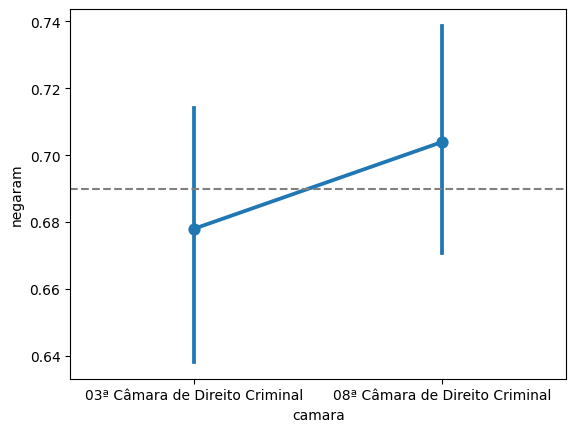

In [53]:
sns.pointplot(data = camaras_filtrado, x = 'camara', y = 'negaram')
plt.axhline(0.69, color='gray', linestyle='--')

**Obs**: O seaborn faz o cálculo do intervalo de confiança automaticamente, logo não precisamos colocar os valores calculados anteriormente. Mas é possível ver que o resultado é o mesmo.

Note que os intervalos se sobrepõem, então, estatisticamente, não podemos afirmar que as proporções são diferentes.

Agora vamos ver um exemplo com outras câmaras.

In [54]:
exemplos_camaras = ['04ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,p
0,04ª Câmara de Direito Criminal,534,0.872659
1,08ª Câmara de Direito Criminal,635,0.703937


Agora, as proporções estão bem distantes. Vamos calcular o intervalo de confiança para essas proporções:

In [55]:
proporcoes_com_ic = (
  proporcoes
  .assign(
    int_otimista = lambda x: stats.norm.ppf(0.975) * np.sqrt((x.p*(1-x.p)) / x.n),
    p_min = lambda x: x.p - x.int_otimista,
    p_max = lambda x: x.p + x.int_otimista
  )
)

proporcoes_com_ic

,camara,n,p,int_otimista,p_min,p_max
0,04ª Câmara de Direito Criminal,534,0.872659,0.028274,0.844385,0.900933
1,08ª Câmara de Direito Criminal,635,0.703937,0.035508,0.668430,0.739445


Finalmente, vamos ver isso graficamente:

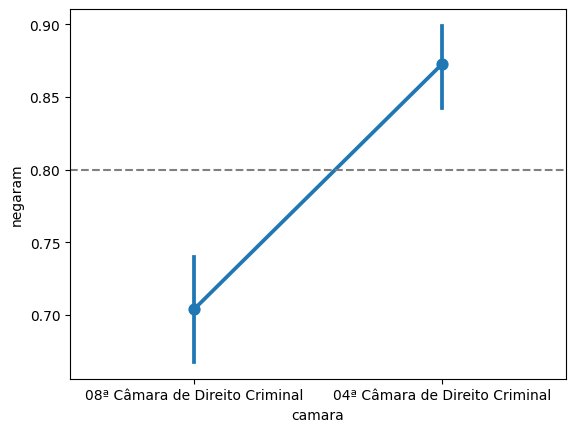

In [56]:
sns.pointplot(data = camaras_filtrado, x = 'camara', y = 'negaram')
plt.axhline(0.80, color='gray', linestyle='--')

Nesse caso, então, concluímos que as proporções são estatisticamente diferentes.

O que acabamos de fazer intuitivamente é o que chamamos de **teste de hipótese de diferença de médias**. No caso, aplicado para proporções. O teste de hipótese é uma forma de formalizar e generalizar a pergunta que fizemos anteriormente. Vamos ver como fazer isso.

### Definição

Um fato curioso sobre o teste de hipóteses é que, geralmente, quando introduzimos o tema, usamos um exemplo jurídico. Isso ocorre porque o teste de hipóteses é uma forma de gerenciar os erros nas tomadas de decisão em ambientes de incerteza, e a tomada de decisão é o que os juízes fazem. Vamos ver esse exemplo, que é o exemplo do julgamento de um réu.

Quando fazemos um teste de hipóteses, estamos tentando decidir entre duas hipóteses: a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$). A hipótese nula é a hipótese que queremos rejeitar, enquanto a hipótese alternativa é a hipótese que queremos aceitar. No exemplo do julgamento de um réu, a hipótese nula é que o réu é inocente, enquanto a hipótese alternativa é que o réu é culpado.

**Dois tipos de erros**. Quando fazemos um teste de hipóteses, podemos cometer dois tipos de erros: o **erro do tipo I** e o **erro do tipo II**. O erro do tipo I ocorre quando rejeitamos a hipótese nula quando ela é verdadeira. No exemplo do julgamento de um réu, seria condenar um réu inocente. O erro do tipo II ocorre quando aceitamos a hipótese nula quando ela é falsa. No exemplo do julgamento de um réu, seria absolver um réu culpado.

![](image.png)

Quando tomamos uma decisão, existem quatro possibilidades:

1) **Rejeitar a hipótese nula quando ela é verdadeira**: isso é o erro do tipo I. A probabilidade de cometer esse erro é chamada de **nível de significância** e é denotada por $\alpha$.

2) **Rejeitar a hipótese nula quando ela é falsa**: isso é o que queremos fazer. A probabilidade de fazer isso é chamada de **poder do teste** e é denotada por $1 - \beta$.

3) **Aceitar a hipótese nula quando ela é verdadeira**: isso é o que queremos evitar. A probabilidade de fazer isso é chamada de **nível de confiança** e é denotada por $1 - \alpha$.

4) **Aceitar a hipótese nula quando ela é falsa**: isso é o erro do tipo II. A probabilidade de cometer esse erro é denotada por $\beta$.

**Definição**. O teste de hipóteses é um procedimento estatístico que nos permite decidir entre duas hipóteses, a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$), com base em uma amostra de dados. O teste de hipóteses é feito em três etapas:

1) **Formulação das hipóteses**: formulamos a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$). A hipótese nula é a hipótese que queremos rejeitar, enquanto a hipótese alternativa é a hipótese que queremos aceitar.

2) **Cálculo da estatística de teste**: calculamos a estatística de teste, que é uma medida da diferença entre a amostra e a hipótese nula. A estatística de teste segue uma distribuição de probabilidades conhecida.

3) **Tomada de decisão**: comparamos a estatística de teste com um valor crítico e decidimos se rejeitamos ou não a hipótese nula.

O procedimento de teste mais conhecido é o teste de Neyman-Pearson, que busca minimizar a probabilidade de erro do tipo II, sujeito a um limite fixado para o erro do tipo I. O teste de Neyman-Pearson é um teste de hipóteses com regra de decisão baseada em um valor crítico.

O valor crítico é o valor que divide a região de rejeição da região de aceitação. A região de rejeição é a região onde rejeitamos a hipótese nula, enquanto a região de aceitação é a região onde aceitamos a hipótese nula. O valor crítico é escolhido de acordo com o nível de significância desejado. Por exemplo, para um nível de significância de 5%, o valor crítico da distribuição normal é 1,96, assim como vimos no z-score para intervalos de confiança.

### Na prática

Na prática, entra em jogo o famoso valor-p (ou p-valor, dependendo do livro). O valor-p é a probabilidade de observar uma estatística de teste tão ou mais extrema quanto a observada, assumindo que a hipótese nula é verdadeira. 

Intuitivamente, o valor-p é a probabilidade de encontrar um resultado que leva à rejeição da hipótese nula por mera coincidência. Em outras palavras: quando a hipótese nula é verdadeira (o réu é inocente), existem fatos que poderiam confundir o juiz ou juíza e levar ao erro, como circunstâncias complexas, preconceito, evidências falsas, entre outros. É isso que estamos chamando de "por coincidência".

Se o valor-p for pequeno, seria muito arriscado afirmar que um efeito identificado (por exemplo, evidências para prender o réu), ocorreu ao acaso, por coincidência. Então rejeitamos a hipótese nula. No entanto, se o valor-p for grande, é bem possível que o resultado encontrado tenha acontecido por acaso, então dizemos que não há evidências para rejeitar a hipótese nula.

### Teste para duas proporções

Vamos voltar ao exemplo da diferença entre a proporção de negados. Faremos um teste de hipóteses para cada situação (o caso em que os intervalos de confiança se sobrepõem e o caso em que os intervalos de confiança não se sobrepõem). Para cada um deles, faremos um exemplo com o cálculo do valor-p e outro exemplo com simulação, para entender o acontecimento "por acaso".

In [60]:
exemplos_camaras = ['03ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), n_negaram = ('negaram', 'sum'), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,n_negaram,p
0,03ª Câmara de Direito Criminal,528,358,0.678030
1,08ª Câmara de Direito Criminal,635,447,0.703937


Nesse caso, nossas hipóteses são:

$H_0$: $p_3 = p_8$, ou seja, as proporções são iguais

$H_1$: $p_3 \neq p_8$, ou seja, as proporções são diferentes

Conectando com os conceitos anteriores: $p_3$ e $p_8$ são **parâmetros**, ou seja, a probabilidade de um caso ser negado em cada câmara.

#### Cálculo do valor-p

Para calcular o valor-p, utilizamos a função `chi2_contingency` do módulo `scipy.stats`. Essa é, na verdade, uma função para fazer o teste qui-quadrado de independência, mas podemos utilizá-la para fazer o teste de diferença de proporções. O retorno é uma tupla com a estatística de teste, o valor-p, o grau de liberdade e a tabela de contingência esperada.

In [63]:
contagens = np.array(proporcoes[['n_negaram', 'n']])

prop_test = stats.chi2_contingency(contagens)

prop_test.pvalue

0.7183537580673838

Esse número significa que, se a hipótese nula fosse verdadeira, a probabilidade de observar uma diferença tão grande ou maior do que a observada seria de 72%. Como esse valor é bem alto, realmente parece que poderia ter acontecido por acaso. Por esse motivo, não rejeitamos a hipótese nula e podemos afirmar que as proporções são iguais. Note que essa é a mesma conclusão que chegamos ao calcular o intervalo de confiança.

No caso do teste comparando as câmaras 8 e 12, temos:

In [64]:
exemplos_camaras = ['12ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), n_negaram = ('negaram', 'sum'), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,n_negaram,p
0,08ª Câmara de Direito Criminal,635,447,0.703937
1,12ª Câmara de Direito Criminal,521,103,0.197697


E agora o teste de hipótese:

In [68]:
contagens = np.array(proporcoes[['n_negaram', 'n']])

prop_test = stats.chi2_contingency(contagens)

prop_test.pvalue

8.238913311602198e-26

Nessa situação, o valor-p é muito baixo, então rejeitamos a hipótese nula e podemos afirmar que as proporções são diferentes. Note que, novamente, essa é a mesma conclusão que chegamos ao calcular o intervalo de confiança.

Existem situações, no entanto, que podemos ficar em dúvida. Vejamos um exemplo, agora com as câmaras 8 e 9

In [98]:
exemplos_camaras = ['06ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), n_negaram = ('negaram', 'sum'), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,n_negaram,p
0,06ª Câmara de Direito Criminal,664,550,0.828313
1,08ª Câmara de Direito Criminal,635,447,0.703937


Vejamos o valor do teste:

In [170]:
contagens = np.array(proporcoes[['n_negaram', 'n']])

prop_test = stats.chi2_contingency(contagens)

prop_test.pvalue

0.05950837666339642

Agora, o valor-p, ou seja, a probabilidade dessa diferença ocorrer ao acaso é de 6%. Esse valor é baixo ou alto?

Nessas situações, precisamos estabelecer um valor de corte para o valor-p. Esse valor de corte é o **nível de significância**, que discutimos anteriormente na definição do teste de hipóteses. Esse valor é denotado por $\alpha$. Por razões históricas, existe um valor de corte muito comum, que é 5%. Se o valor-p for menor que 5%, rejeitamos a hipótese nula. Se o valor-p for maior que 5%, não rejeitamos a hipótese nula. Essa é a "regra de bolso" usada em muitas áreas da ciência.

Nesse caso, então, a conclusão é que as proporções não são diferentes, porque o valor-p é maior que 5%.

### Teste para várias proporções

E se nosso objetivo for comparar mais de duas proporções? Nesse caso, uma ideia inicial seria comparar cada par de proporções. Mas existe uma alternativa melhor, que é fazer um teste de hipóteses para todas as proporções ao mesmo tempo. Isso é feito com o teste de qui-quadrado.

O teste de qui-quadrado é um teste de hipóteses que compara a distribuição observada com a distribuição esperada. No caso de proporções, a distribuição observada é a proporção de casos em cada categoria, enquanto a distribuição esperada é a proporção de casos esperada se a hipótese nula fosse verdadeira.

Por exemplo, se quisermos comparar as proporções de negados, parcial procedente e procedente nas câmaras 3, 8 e 12, nossas hipóteses são:

$H_0$: a distribuição de decisões é a mesma nas três câmaras

$H_1$: a distribuição de decisões é diferente em alguma das câmaras

No python, podemos fazer o teste de qui-quadrado com a mesma função de antes: `chi2_contingency` do módulo `scipy.stats`. O retorno é uma tupla com a estatística de teste, o valor-p, o grau de liberdade e a tabela de contingência esperada.

In [248]:
exemplos_camaras = ['03ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal', '12ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .query('decisao == ["Negaram","Parcialmente","Provido"]')
)

tabela_contingencia = pd.crosstab(index=camaras_filtrado['camara'], columns=camaras_filtrado['decisao'])

tabela_contingencia


decisao,Negaram,Parcialmente,Provido
camara,,,
03ª Câmara de Direito Criminal,358,140,10
08ª Câmara de Direito Criminal,447,156,7
12ª Câmara de Direito Criminal,103,321,75


Veja que as proporções são parecidas entre as câmaras 03 e 08, mas bem diferente na câmara 12:

In [254]:
tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0)

decisao,Negaram,Parcialmente,Provido
camara,,,
03ª Câmara de Direito Criminal,0.704724,0.275591,0.019685
08ª Câmara de Direito Criminal,0.732787,0.255738,0.011475
12ª Câmara de Direito Criminal,0.206413,0.643287,0.150301


Agora, procedemos com o teste:

In [255]:
chi2 = stats.chi2_contingency(tabela_contingencia)

chi2

Chi2ContingencyResult(statistic=403.3146570240564, pvalue=5.346841438716827e-86, dof=4, expected_freq=array([[285.25912183, 193.83797155,  28.90290662],
       [342.53555968, 232.75819419,  34.70624613],
       [280.20531849, 190.40383426,  28.39084725]]))

Nesse objeto, temos os seguintes componentes:

- statistic: a estatística de teste, que é a base para o cálculo do valor-p
- pvalue: o valor-p, que é a probabilidade de observar uma estatística de teste tão ou mais extrema quanto a observada, assumindo que a hipótese nula é verdadeira
- dof: o grau de liberdade, que é o número de categorias menos um
- expected: a tabela de contingência esperada, que é a distribuição esperada se a hipótese nula fosse verdadeira

Nesse caso, o valor-p é muito baixo, então rejeitamos a hipótese nula e podemos afirmar que a distribuição de decisões é diferente em alguma das câmaras.

### Teste de médias

Até agora, vimos o teste de proporções e o teste de uma tabela de contingência completa, que é um teste de proporções generalizado. Agora, vamos ver o teste de médias. A ideia é muito parecida com o que vimos antes, mas nesse caso utilizamos outra distribuição de probabilidades, a distribuição t de Student e, portanto, outra função do python, `ttest_ind` do módulo `scipy.stats`. Nos apêndices extras dessa apostila, temos uma explicação mais detalhada sobre a distribuição t de Student.

Para mostrar o teste de médias, vamos fazer um exemplo com a diferença de médias de idade entre relatores que vieram ou não do quinto constitucional. Nesse caso, nossas hipóteses são:

$H_0$: a média de idade dos relatores que vieram do quinto constitucional é igual à média de idade dos relatores que não vieram do quinto constitucional

$H_1$: a média de idade dos relatores que vieram do quinto constitucional é diferente da média de idade dos relatores que não vieram do quinto constitucional

In [3]:
relatores = camaras.drop_duplicates('relator')

(
  relatores
  .groupby('rel_quinto')
  .agg(n = ('relator', len), media = ('rel_idade', 'mean'), sd = ('rel_idade', 'std'))
  .reset_index(names='rel_quinto')
)

,rel_quinto,n,media,sd
0,não,88,67.173987,5.911481
1,sim,21,65.910368,6.665895


Olhando os dados, parece que a média de idades é bem parecida. Vamos fazer o gráfico com os intervalos de confiança:

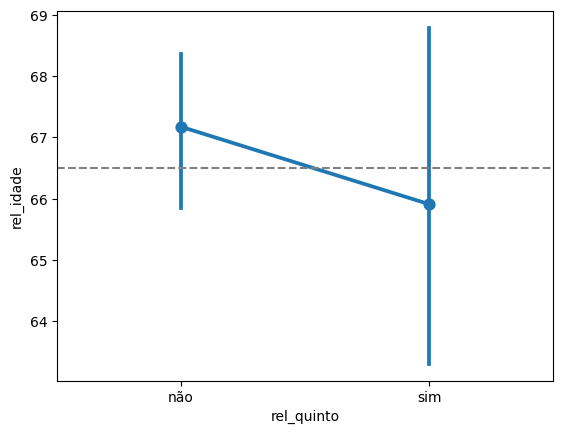

In [7]:
sns.pointplot(data = relatores, x = 'rel_quinto', y = 'rel_idade')
plt.axhline(66.5, color='gray', linestyle='--')

De fato, os intervalos de confiança se sobrepõem. Vamos fazer o teste de hipóteses, usando a função `ttest_ind`:

In [19]:
ttest = stats.ttest_ind(
  relatores.rel_idade[relatores.rel_quinto == 'sim'],
  relatores.rel_idade[relatores.rel_quinto == 'não'],
  nan_policy='omit'
)

ttest


TtestResult(statistic=-0.8574885189308531, pvalue=0.3931095647661792, df=106.0)

De fato, o valor-p ficou em 39%, então não rejeitamos a hipótese nula, ou seja, não há evidências para afirmar que as idades dos relatores que vieram do quinto constitucional são diferentes das idades dos relatores que não vieram do quinto constitucional.

Agora, vamos ver um exemplo em que as médias são diferentes. Vamos comparar a média de idade dos relatores que vieram da USP com a média de idade dos relatores que vieram de outras universidades. Nesse caso, nossas hipóteses são:

$H_0$: a média de idade dos relatores que vieram da USP é igual à média de idade dos relatores que vieram de outras universidades

$H_1$: a média de idade dos relatores que vieram da USP é diferente da média de idade dos relatores que vieram de outras universidades

Vamos fazer o gráfico com os intervalos de confiança:

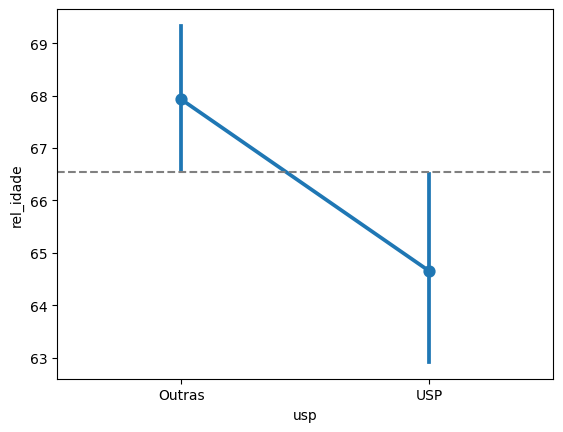

In [37]:
# o nome da faculdade de direito pode aparecer de diversas formas
usp = ['Faculdade de Direito da Universidade de São Paulo', 'Faculdade de Direto da Universidade de São Paulo', 'Universidade de São Paulo']

relatores_usp = (
  relatores
  .assign(usp = lambda x: np.where(x.rel_faculdade_direito.isin(usp), 'USP', 'Outras'))
)

sns.pointplot(data = relatores_usp, x = 'usp', y = 'rel_idade')
plt.axhline(66.55, color='gray', linestyle='--')

É por muito pouco, mas parece que as médias são diferentes. Vamos fazer o teste de hipóteses:

In [41]:
ttest = stats.ttest_ind(
  relatores_usp.rel_idade[relatores_usp.usp == 'USP'],
  relatores_usp.rel_idade[~(relatores_usp.usp == 'USP')],
  nan_policy='omit'
)

ttest


TtestResult(statistic=-2.663336219551609, pvalue=0.00894402839660715, df=106.0)

De fato, o valor-p ficou em 0.009, então rejeitamos a hipótese nula e podemos afirmar que a média de idade dos relatores que vieram da USP é diferente da média de idade dos relatores que vieram de outras universidades.

----------------------------------

### (extra) Simulação

O que significa, na prática, a tal da "ocorrência ao acaso"? Vamos mostrar isso através de uma simulação. Vamos simular 1000 vezes a proporção de negados em duas câmaras. Para isso, no entanto, precisamos supor que a hipótese nula é verdadeira, ou seja, que as proporções são iguais. Vamos supor que a proporção das duas câmaras é 60%.

In [206]:
def amostra_diferenca(prop1, prop2, n=1000):
  # faz uma amostra com os
  camara1 = np.random.choice([0,1], n, p=[1-prop1,prop1])
  camara2 = np.random.choice([0,1], n, p=[1-prop2,prop2])
  # calcula a proporção
  prop_camara1 = camara1.mean()
  prop_camara2 = camara2.mean()
  # diferença entre câmaras
  diferenca = prop_camara1 - prop_camara2
  contagens = np.array([[camara1.sum(), camara2.sum()], [n-camara1.sum(), n-camara2.sum()]])
  valor_p = stats.chi2_contingency(contagens).pvalue
  df = pd.DataFrame({
    'prop1': prop_camara1,
    'prop2': prop_camara2,
    'diferenca': diferenca,
    'valor_p': valor_p
  }, index=[0])
  return df

In [208]:
amostra_diferenca(0.6, 0.6)

,prop1,prop2,diferenca,valor_p
0,0.602,0.628,-0.026,0.250625


vamos fazer essa conta mil vezes:

In [209]:
amostras = []
for _ in range(1000):
  amostras.append(amostra_diferenca(0.6, 0.6))

df = pd.concat(amostras)

df

,prop1,prop2,diferenca,valor_p
0,0.589,0.609,-0.020,0.386014
0,0.579,0.610,-0.031,0.171856
0,0.582,0.603,-0.021,0.362750
0,0.590,0.592,-0.002,0.963724
0,0.605,0.601,0.004,0.890948
...,...,...,...,...
0,0.613,0.616,-0.003,0.926790
0,0.595,0.584,0.011,0.649429
0,0.587,0.600,-0.013,0.584865
0,0.583,0.595,-0.012,0.617133


Agora, fazemos um histograma das diferenças:

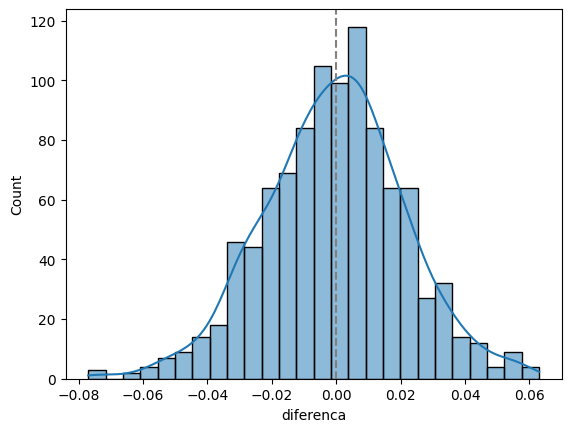

In [210]:
sns.histplot(data=df, x='diferenca', kde=True)
plt.axvline(0, color='gray', linestyle='--')

Veja como, nesse caso, a diferença fica centrada no zero. Nessa simulação, se extrairmos os quantis de 2,5% e 97,5%, temos o intervalo de confiança simulado para essa diferença. Veja que ela contém o zero:

In [186]:
np.quantile(df.diferenca, [0.025, 0.975])

array([-0.041025,  0.041   ])

E veja que interessante, a proporção de vezes em que, ao fazer o teste de hipóteses, rejeitaríamos a hipótese nula:

In [212]:
(df.valor_p < 0.05).mean()

0.053

Ou seja, em aproximadamente 5% das amostras, nós rejeitaríamos a hipótese nula, mesmo ela sendo verdadeira. Isso é o erro do tipo I, que é o nível de significância que escolhemos.

Agora, vamos para um exemplo onde as proporções são diferentes, 60% e 70%:

In [213]:
amostras = []
for _ in range(1000):
  amostras.append(amostra_diferenca(0.7, 0.6))

df = pd.concat(amostras)

df

,prop1,prop2,diferenca,valor_p
0,0.702,0.605,0.097,6.449431e-06
0,0.698,0.586,0.112,2.251830e-07
0,0.671,0.611,0.060,5.956293e-03
0,0.732,0.582,0.150,2.243348e-12
0,0.695,0.614,0.081,1.686924e-04
...,...,...,...,...
0,0.689,0.597,0.092,2.166091e-05
0,0.700,0.606,0.094,1.250206e-05
0,0.696,0.596,0.100,3.671498e-06
0,0.691,0.592,0.099,4.889018e-06


O histograma fica assim:

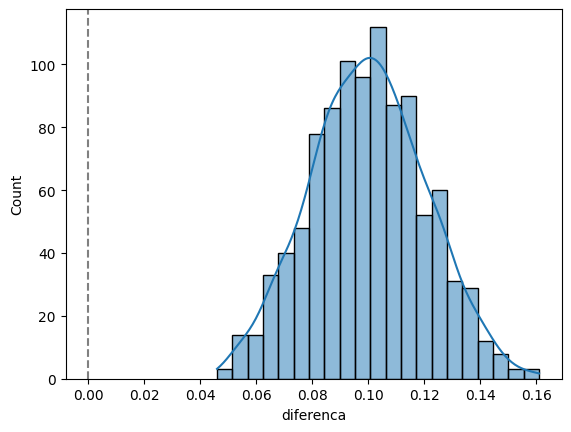

In [214]:
sns.histplot(data=df, x='diferenca', kde=True)
plt.axvline(0, color='gray', linestyle='--')

E o intervalo de confiança simulado fica assim:

In [215]:
np.quantile(df.diferenca, [0.025, 0.975])

array([0.059975, 0.141   ])

Veja que dessa vez o intervalo não contém o zero. Ou seja, a diferença é estatisticamente diferente de zero.

Agora, veja a proporção de vezes que o valor-p é menor de 5%:

In [216]:
(df.valor_p < 0.05).mean()

1.0

Todas as vezes! Ou seja, em 100% das amostras, rejeitaríamos a hipótese nula, o que é esperado, já que ela é falsa.

Agora vamos para um exemplo onde as proporções são diferentes, mas não muito, 60% e 62%:

In [217]:
amostras = []
for _ in range(1000):
  amostras.append(amostra_diferenca(0.62, 0.60))

df = pd.concat(amostras)

df

,prop1,prop2,diferenca,valor_p
0,0.623,0.615,0.008,0.747217
0,0.611,0.584,0.027,0.235815
0,0.625,0.614,0.011,0.645114
0,0.599,0.594,0.005,0.855337
0,0.650,0.625,0.025,0.264270
...,...,...,...,...
0,0.644,0.609,0.035,0.116030
0,0.625,0.604,0.021,0.358177
0,0.618,0.599,0.019,0.409579
0,0.625,0.601,0.024,0.291009


O histograma fica assim:

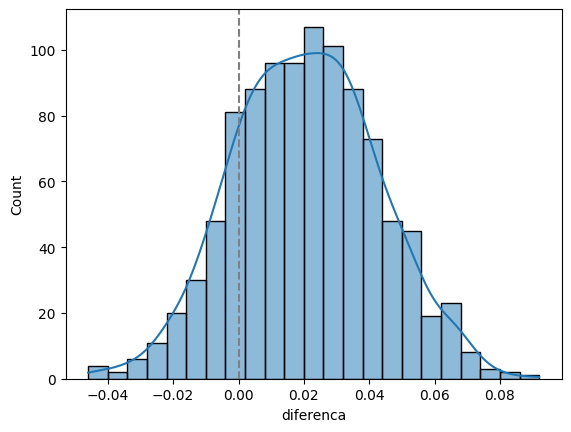

In [218]:
sns.histplot(data=df, x='diferenca', kde=True)
plt.axvline(0, color='gray', linestyle='--')

E o intervalo de confiança simulado fica assim:

In [219]:
np.quantile(df.diferenca, [0.025, 0.975])

array([-0.022,  0.065])

Veja que dessa vez o intervalo não contém o zero. Ou seja, a diferença é estatisticamente diferente de zero.

Agora, veja a proporção de vezes que o valor-p é menor de 5%:

In [220]:
(df.valor_p < 0.05).mean()

0.15

Nesse caso, não há evidências suficientes para rejeitar a hipótese nula. Isso é o que ocorre quando temos uma diferença na população que é muito pequena. Mas tem um jeito de detectar essa diferença, que é aumentando o tamanho da amostra. Vamos ver isso. Considere que, ao invés de 1000 observações, temos 5000:

In [239]:
amostras = []
for _ in range(1000):
  amostras.append(amostra_diferenca(0.62, 0.60, 5000))

df = pd.concat(amostras)

df

,prop1,prop2,diferenca,valor_p
0,0.6302,0.5914,0.0388,0.000075
0,0.6274,0.6010,0.0264,0.007121
0,0.6206,0.5982,0.0224,0.022898
0,0.6198,0.6014,0.0184,0.062009
0,0.6196,0.5982,0.0214,0.029845
...,...,...,...,...
0,0.6194,0.6086,0.0108,0.276297
0,0.6134,0.6060,0.0074,0.460526
0,0.6222,0.5976,0.0246,0.012379
0,0.6134,0.6092,0.0042,0.681590


O histograma fica assim:

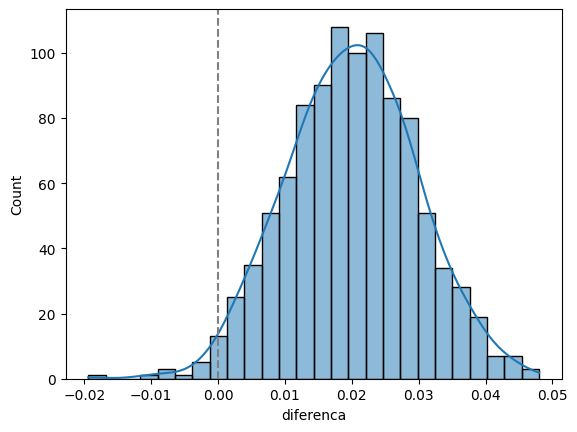

In [240]:
sns.histplot(data=df, x='diferenca', kde=True)
plt.axvline(0, color='gray', linestyle='--')

E o intervalo de confiança simulado fica assim:

In [241]:
np.quantile(df.diferenca, [0.025, 0.975])

array([0.0018, 0.0388])

Veja que dessa vez o intervalo não contém o zero. Ou seja, a diferença é estatisticamente diferente de zero.

Agora, veja a proporção de vezes que o valor-p é menor de 5%:

In [243]:
(df.valor_p < 0.05).mean()

0.536

Veja que em mais da metade das amostras que fizemos, o valor-p foi menor de 5%.

Essas simulações mostram como o valor-p é uma medida de quão extremo é o resultado observado. Se a diferença entre as proporções for muito pequena, o valor-p será alto, indicando que a diferença pode ter ocorrido por acaso. Se a diferença for grande, o valor-p será baixo, indicando que a diferença é estatisticamente significante.

--------------------------

### (extra) por que usamos t-student?

Na apostila anterior e no início dessa apostila, vimos intevalos de confiança baseados no valor de $z_{1-\alpha/2}$.

Nos livros didáticos, o que temos é que esse valor $z$ é usado quando a **variância populacional ($\sigma^2$) é conhecida**, enquanto, quando a variância populacional é desconhecida, usamos o valor $t$, da distribuição t-Student. É daí que vem o termo "teste t", que são os testes que usam a distribuição t-Student no lugar da distribuição normal.

A origem disso está na suposição sobre a **distribuição de probabilidades da variável** de interesse. Quando supomos que a variável de interesse é normal, existe um resultado mostrando que a média amostral ($\bar X$) dividida pelo desvio padrão amostral ($S$) e multiplicada por uma constante **segue uma distribuição t de Student**. Essa constante é chamada de **graus de liberdade** e no caso que estamos estudando é dada por $n-1$, onde $n$ é o tamanho da amostra.

Vamos desenhar a t-student para alguns valores de $n$, comparando-a com a distribuição normal.

<Axes: xlabel='x', ylabel='densidade'>

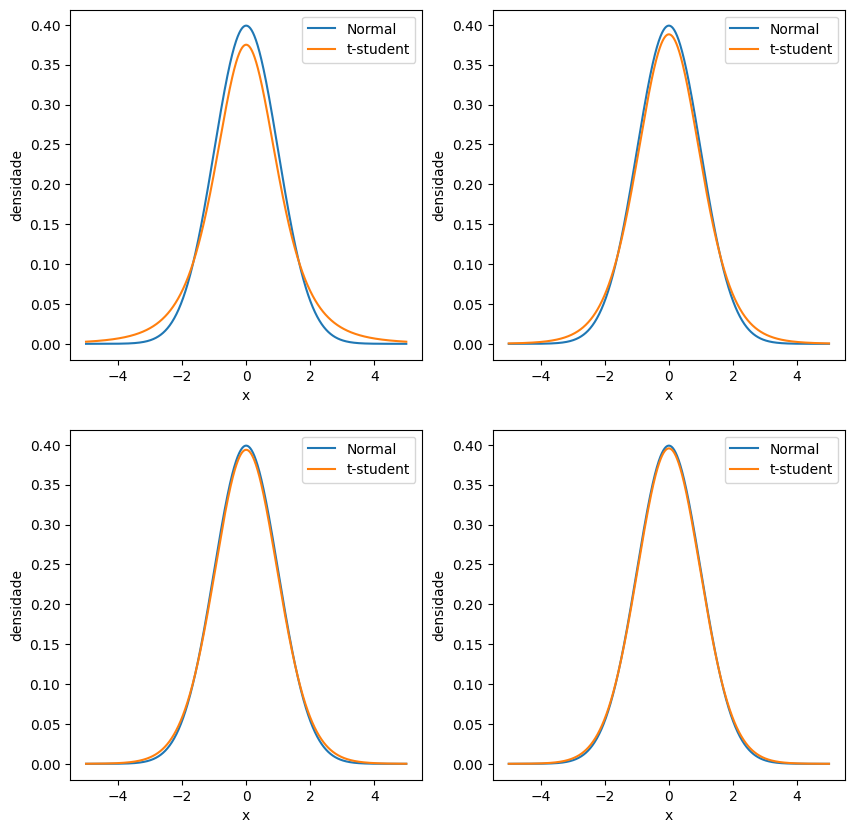

In [62]:
valores_n = [5, 10, 20, 30]

x = np.linspace(-5, 5, 1000)

df = pd.DataFrame({'x': x, 'densidade': stats.norm.pdf(x)})

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# mostrando a distribuição t-student para os diferentes valores de n

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[0] - 1))
# mostrando o gráfico da normal
sns.lineplot(ax = axes[0,0], data = df, x = 'x', y = "densidade", label="Normal")
# mostrando o gráfico da t-student
sns.lineplot(ax = axes[0,0], data = df, x = 'x', y = 't_pdf', label="t-student")

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[1] - 1))
sns.lineplot(ax = axes[0,1], data = df, x = 'x', y = "densidade", label="Normal")
sns.lineplot(ax = axes[0,1], data = df, x = 'x', y = 't_pdf', label="t-student")

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[2] - 1))
sns.lineplot(ax = axes[1,0], data = df, x = 'x', y = "densidade", label="Normal")
sns.lineplot(ax = axes[1,0], data = df, x = 'x', y = 't_pdf', label="t-student")

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[3] - 1))
sns.lineplot(ax = axes[1,1], data = df, x = 'x', y = "densidade", label="Normal")
sns.lineplot(ax = axes[1,1], data = df, x = 'x', y = 't_pdf', label="t-student")



Veja que para valores pequenos de $n$, a t-student é mais larga que a distribuição normal. Isso ocorre porque a variância amostral é uma estimativa da variância populacional e, portanto, é mais incerta. Conforme o tamanho da amostra aumenta, a t-student se aproxima da distribuição normal.

Portanto, o t-score é usado quando temos a suposição de normalidade e é mais útil quando temos poucos dados, já que, quando temos muitos dados, os números são quase equivalentes ao z-score. 

Já o z-score pode ser usado em **duas situações**: 

1) quando assumimos que a variável de interesse tem distribuição normal e variância conhecida (portanto, não temos a razão entre a média e o desvio padrão amostrais), ou 

2) quando a variavel de interesse não é normal e usamos o TCL para aproximar a distribuição amostral da média. Neste segundo caso, existe um teorema adicional, chamado [teorema de Slutsky](https://en.wikipedia.org/wiki/Slutsky%27s_theorem), que, a partir do resultado de que o desvio padrão amostral converge em probabilidade para o desvio padrão da população, mostra que o z-score é assintoticamente normal. 

Por isso que dizemos que o z-score é usado quando a variância populacional é conhecida ou quando o tamanho da amostra é grande. Se não, supomos que a variável de interesse é normal e usamos o t-score.

#### Aplicação no python

No python, podemos fazer o intervalo de confiança com t-score fazendo as seguintes operações:


In [ ]:
tempos = camaras.tempo
media = tempos.mean()
sd = tempos.std()
z = stats.norm.ppf(0.975)
tscore = stats.t.ppf(0.975, df = len(tempos) - 1)
n = len(tempos)

vl_intervalo_t = tscore * sd / np.sqrt(n)

media - vl_intervalo_t, media + vl_intervalo_t

(3.1360526281801846, 3.2216300942330562)

Como nossa amostra é grande, o resultado é praticamente o mesmo. Vamos ver com uma amostra pequena, comparando com o z-score:

In [ ]:
tempos = camaras.sample(20, random_state=42).tempo

media = tempos.mean()
sd = tempos.std()

z = stats.norm.ppf(0.975)
tscore = stats.t.ppf(0.975, df = len(tempos) - 1)

n = len(tempos)

vl_intervalo_z = z * sd / np.sqrt(n)
vl_intervalo_t = tscore * sd / np.sqrt(n)

print(media - vl_intervalo_z, media + vl_intervalo_z)
print(media - vl_intervalo_t, media + vl_intervalo_t)

2.037385709232428 4.425311073792897
1.9563287310545743 4.5063680519707505


Veja como o intervalo de confiança da normal é mais "otimista" do que o intervalo de confiança da t-student. Isso ocorre porque a t-student é mais larga, refletindo a incerteza adicional devido à variância amostral, enquanto a normal é mais estreita e faz uso de teoremas de convergência para aproximar a distribuição amostral da média.